# README.md

In [53]:
## Research question: For the approach #2 big cohort, how many have ADT window assgined, 
## with T baseline, and have T recovery and non-recovery status? 

## Table of Contents

# Step1, read from spreadsheet, clean up, and get statistics

In [54]:
import numpy as np
from pandas import DataFrame

import pandas as pd
import sys, getopt
import csv
from datetime import datetime
from datetime import timedelta, date
import itertools

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

%matplotlib inline  
import seaborn as sns

In [55]:
df1=pd.read_excel("./data/sean_table_feb10_prostate_byml_ADT_v25.xlsx", header=0)
df1.replace(r'', np.NaN)
#df1.fillna('', inplace=True)
#df1['inital_ADT_end_date'] = pd.to_datetime(df1['inital_ADT_end_date'])

df_test=pd.read_excel("./data/pca_tresults_20210119_BP_fixed.xlsx", header=0)
#df3=pd.read_csv("just_start_empty.csv", header=0)
df_test.replace(r'', np.NaN)
df_test[:5]

,person_id,cancer_type_id,year_of_diagnosis,month_of_diagnosis,day_of_diagnosis,dx_date,result_date,loinc_code,source_test_name,test_results
0,2,2,2003,1.0,7.0,2003-01-07,2006-09-05,49041-7,TESTOSTERONE,351.0
1,2,2,2003,1.0,7.0,2003-01-07,2007-01-09,49041-7,TESTOSTERONE,304.0
2,2,2,2003,1.0,7.0,2003-01-07,2007-05-17,49041-7,TESTOSTERONE,259.0
3,2,2,2003,1.0,7.0,2003-01-07,2007-06-12,49041-7,TESTOSTERONE,382.0
4,2,2,2003,1.0,7.0,2003-01-07,2007-06-28,49041-7,TESTOSTERONE,439.0


In [56]:
print(shape(df1))
print(shape(df_test))

(80490, 12)
(18643, 10)


In [57]:
df1[:3]

,person_id,dxdate,dx_year,source_from,evidence,hormone_therapy,cancer_drug,matched_text,category,date_year,date_month,date_day
0,2,2003-01-07,2003,Notes,"By 2/10/09, his PSA had risen to 7.03 thus res...",ADT,Leuprolide,lupron,Hormone Therapy,2009.0,2.0,26.0
1,2,2003-01-07,2003,Notes,"By 2/10/09, his PSA had risen to 7.03 thus res...",ADT,Leuprolide,lupron,Hormone Therapy,2009.0,9.0,15.0
2,2,2003-01-07,2003,Notes,Developed L3 lesion s/p EBRT (3/27/09-4/2/09) ...,ADT,Leuprolide,lupron,Hormone Therapy,2010.0,5.0,24.0


In [58]:
df1_pt_grouped=df1.groupby(["person_id"]).size().reset_index(name='counts')
list_pt=df1_pt_grouped["person_id"].to_list()
print("")
print("Total number of pts")
print(len(list_pt))


Total number of pts
4391


In [59]:
list_pt[:10]

[2, 12, 13, 18, 22, 25, 26, 37, 38, 53]

In [60]:
###make sure all pts are included in the T test result table

df_tvalue_grouped=df_test.groupby(["person_id"]).size().reset_index(name='counts')
list_pt_test=df_tvalue_grouped["person_id"].to_list()
print("list of pt ids with t test results")
print(len(list_pt_test))
print("")
print(len(list_pt))

overlap_list=[x for x in list_pt if x in  list_pt_test]
print(len(overlap_list))

list of pt ids with t test results
4490

4391
1499


In [61]:
#get the subtable with date_month empty
#get the subtable with data_month
#get the overlap
#get the pts stats

In [62]:
#subgroup of pt with data year not empty
df_notempty_date_year=df1[df1.date_year.notnull()]

df_notempty_grouped_year=df_notempty_date_year.groupby(["person_id"]).size().reset_index(name='counts')
list_notempty_pt_year=df_notempty_grouped_year["person_id"].to_list()
print("pts with year not empty:")
print(len(list_notempty_pt_year))


#subgroup of pt with data month not empty
df_notempty_date_month=df1[df1.date_month.notnull()]

df_notempty_grouped_month=df_notempty_date_month.groupby(["person_id"]).size().reset_index(name='counts')
list_notempty_pt_month=df_notempty_grouped_month["person_id"].to_list()

print("pts with month not empty:")
print(len(list_notempty_pt_month))


#subgroup of pt with data day not empty
df_notempty_date_day=df1[df1.date_day.notnull()]

df_notempty_grouped_day=df_notempty_date_day.groupby(["person_id"]).size().reset_index(name='counts')
list_notempty_pt_day=df_notempty_grouped_day["person_id"].to_list()
print("pts with day not empty:")
print(len(list_notempty_pt_day))

pts with year not empty:
2510
pts with month not empty:
2450
pts with day not empty:
2317


# List of pts with both year and month date

In [63]:
pts_with_both_year_month=[x for x in list_notempty_pt_year if x in list_notempty_pt_month]
len(pts_with_both_year_month)

2450

# List of 1941 pts that are useless because they don't have both ADT year and month info 

In [64]:
pts_without_year_month=[x for x in list_pt if x not in pts_with_both_year_month]
print(len(pts_without_year_month))

#save the list for QC
df_pts_without_year_month=DataFrame(pts_without_year_month,columns=['pt_id'])
df_pts_without_year_month.to_csv("1941pts_without_year_month_approach#2.csv",encoding='utf-8', index=False)

1941


# How many of these have T test results 

In [65]:
pts_have_yearmonth_with_test_list=[x for x in pts_with_both_year_month if x in  list_pt_test]
print(len(pts_have_yearmonth_with_test_list))

1206


In [66]:
#subgroup of pt with data year empty
df_empty_year=df1[df1.date_year.isnull()]

df_empty_year_grouped=df_empty_year.groupby(["person_id"]).size().reset_index(name='counts')
list_empty_year_pt=df_empty_year_grouped["person_id"].to_list()
print("pts with empty year:")
print(len(list_empty_year_pt))

#subgroup of pt with data month empty
df_empty_month=df1[df1.date_month.isnull()]

df_empty_month_grouped=df_empty_month.groupby(["person_id"]).size().reset_index(name='counts')
list_empty_month_pt=df_empty_month_grouped["person_id"].to_list()
print("pts with empty month:")
print(len(list_empty_month_pt))

#subgroup of pt with data month empty
df_empty_day=df1[df1.date_day.isnull()]

df_empty_day_grouped=df_empty_day.groupby(["person_id"]).size().reset_index(name='counts')
list_empty_day_pt=df_empty_day_grouped["person_id"].to_list()
len(list_empty_day_pt)
print("pts with empty day:")
print(len(list_empty_day_pt))

pts with empty year:
4273
pts with empty month:
4292
pts with empty day:
4305


In [67]:
pt_with_missingyear_useless_list=[x for x in list_empty_year_pt if x not in list_notempty_pt_year]

print("pt with year missing for all drugs and hence useless")
print(len(pt_with_missingyear_useless_list))

pt_with_missingmonth_useless_list=[x for x in list_empty_month_pt if x not in list_notempty_pt_month]

print("pt with month missing for all drugs and hence useless")
print(len(pt_with_missingmonth_useless_list)) 

pt with year missing for all drugs and hence useless
1881
pt with month missing for all drugs and hence useless
1941


# Useless pts due to missing year or month; enssentially no ADT info captured 1941

In [68]:
#useless due to missing year or month

a_list=[x for x in pt_with_missingyear_useless_list if x not in pt_with_missingmonth_useless_list]
b_list=[x for x in pt_with_missingmonth_useless_list if x not in pt_with_missingyear_useless_list]
c_list=[x for x in  pt_with_missingyear_useless_list if x in pt_with_missingmonth_useless_list]

pt_with_emptymonthoryear_list=a_list+b_list+c_list
print(len(a_list))
print(len(b_list))
print(len(c_list))
print(len(pt_with_emptymonthoryear_list))

0
60
1881
1941


In [69]:
df1[25:30]

,person_id,dxdate,dx_year,source_from,evidence,hormone_therapy,cancer_drug,matched_text,category,date_year,date_month,date_day
25,2,2003-01-07,2003,Notes,Lupron administered as per MAR.,ADT,Leuprolide,lupron,Hormone Therapy,NaN,NaN,NaN
26,2,2003-01-07,2003,Notes,Pt given a single dose of Lupron Depot 3 month...,ADT,Leuprolide,lupron depot,Hormone Therapy,NaN,NaN,NaN
27,2,2003-01-07,2003,Notes,"- continue leuprolide q 3 months, will receive...",ADT,Leuprolide,leuprolide,Hormone Therapy,NaN,NaN,NaN
28,2,2003-01-07,2003,Notes,"Lupron administered in L buttock, tolerated well.",ADT,Leuprolide,lupron,Hormone Therapy,NaN,NaN,NaN
29,2,2003-01-07,2003,Notes,Patient received lupron and Xgeva ingections t...,ADT,Leuprolide,lupron,Hormone Therapy,NaN,NaN,NaN


In [70]:
df1_copy=df1

# Filling the missing day with 1

In [71]:
df1_copy['date_day'].mask(df1_copy.date_day.isnull(), '1', inplace=True)
df1_copy.date_day=df1_copy.date_day.astype(float)

In [72]:
df1_copy[0:3]

,person_id,dxdate,dx_year,source_from,evidence,hormone_therapy,cancer_drug,matched_text,category,date_year,date_month,date_day
0,2,2003-01-07,2003,Notes,"By 2/10/09, his PSA had risen to 7.03 thus res...",ADT,Leuprolide,lupron,Hormone Therapy,2009.0,2.0,26.0
1,2,2003-01-07,2003,Notes,"By 2/10/09, his PSA had risen to 7.03 thus res...",ADT,Leuprolide,lupron,Hormone Therapy,2009.0,9.0,15.0
2,2,2003-01-07,2003,Notes,Developed L3 lesion s/p EBRT (3/27/09-4/2/09) ...,ADT,Leuprolide,lupron,Hormone Therapy,2010.0,5.0,24.0


# Convert year, month, day into a single date number in the timedate format

In [73]:
df1_copy["full_date"]=pd.to_datetime((df1_copy.date_year*10000 + df1_copy.date_month*100+df1_copy.date_day).apply(str),format='%Y%m%d')
df1_copy["full_date"]

0       2009-02-26
1       2009-09-15
2       2010-05-24
3       2010-09-24
4       2013-05-20
           ...    
80485          NaT
80486          NaT
80487   2018-04-18
80488          NaT
80489   2019-12-20
Name: full_date, Length: 80490, dtype: datetime64[ns]

In [74]:
#get rid of rows where full_dates are NaT
df1_fulldate_notna= df1_copy[df1_copy["full_date"].notna()]
print(shape(df1_copy)[0])
print(shape(df1_fulldate_notna)[0])

80490
17482


In [75]:
df1_fulldate_notna[:3]

,person_id,dxdate,dx_year,source_from,evidence,hormone_therapy,cancer_drug,matched_text,category,date_year,date_month,date_day,full_date
0,2,2003-01-07,2003,Notes,"By 2/10/09, his PSA had risen to 7.03 thus res...",ADT,Leuprolide,lupron,Hormone Therapy,2009.0,2.0,26.0,2009-02-26
1,2,2003-01-07,2003,Notes,"By 2/10/09, his PSA had risen to 7.03 thus res...",ADT,Leuprolide,lupron,Hormone Therapy,2009.0,9.0,15.0,2009-09-15
2,2,2003-01-07,2003,Notes,Developed L3 lesion s/p EBRT (3/27/09-4/2/09) ...,ADT,Leuprolide,lupron,Hormone Therapy,2010.0,5.0,24.0,2010-05-24


In [76]:
df3=df1_fulldate_notna[df1_fulldate_notna.hormone_therapy=="ADT"]
len(df3)

17482

In [77]:
#output this table 
df3.to_csv("sean_big_1206pts_cohort_cleanup_table.csv",encoding='utf-8', index=False)

# Pts with only one ADT use: 507 pts

In [78]:
df3_grouped_pt_adtcount=df3.groupby(["person_id"]).size().reset_index(name='counts')
df3_grouped_pt_adtcount
#pick pts with just one ADT

df_one_adt=df3_grouped_pt_adtcount[(df3_grouped_pt_adtcount["counts"] == 1)]
df_one_adt

list_one_adt_pt=df_one_adt["person_id"].to_list()
print(len(list_one_adt_pt))

507


In [79]:
df3[:5]

,person_id,dxdate,dx_year,source_from,evidence,hormone_therapy,cancer_drug,matched_text,category,date_year,date_month,date_day,full_date
0,2,2003-01-07,2003,Notes,"By 2/10/09, his PSA had risen to 7.03 thus res...",ADT,Leuprolide,lupron,Hormone Therapy,2009.0,2.0,26.0,2009-02-26
1,2,2003-01-07,2003,Notes,"By 2/10/09, his PSA had risen to 7.03 thus res...",ADT,Leuprolide,lupron,Hormone Therapy,2009.0,9.0,15.0,2009-09-15
2,2,2003-01-07,2003,Notes,Developed L3 lesion s/p EBRT (3/27/09-4/2/09) ...,ADT,Leuprolide,lupron,Hormone Therapy,2010.0,5.0,24.0,2010-05-24
3,2,2003-01-07,2003,Notes,Developed L3 lesion s/p EBRT (3/27/09-4/2/09) ...,ADT,Leuprolide,lupron,Hormone Therapy,2010.0,9.0,24.0,2010-09-24
4,2,2003-01-07,2003,Medtable,LEUPROLIDE (3 MONTH) 22.5 MG IM SYRINGE KIT,ADT,Leuprolide,leuprolide,Hormone Therapy,2013.0,5.0,20.0,2013-05-20


In [80]:
df3_grouped=df3.groupby(["person_id"]).size().reset_index(name='counts')
df3_grouped_pt=df3_grouped.person_id.to_list()
print("pt_list")
print(len(df3_grouped_pt))
pt_list=df3_grouped_pt

pt_list
2450


In [81]:
df_pt=df3[(df3["person_id"] ==15103)]
each_pt_dates= df_pt['full_date'].to_list()
each_pt_dates

[Timestamp('2017-09-12 00:00:00'), Timestamp('2017-09-12 00:00:00')]

In [82]:
df_pt=df3[(df3["person_id"] ==122)]
each_pt_dates= df_pt['full_date'].to_list()
each_pt_dates

[Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00')]

In [83]:
each_pt_dates[1]

Timestamp('2013-02-01 00:00:00')

In [84]:
# define a function that group consecutive dates with a tolerate gap of 7 months

def group_runs(li,tolerance=212.9):
    out = []
    last = li[0]
    for x in li:
        if float(abs(x-last).days) > tolerance:
            yield out
            out = []
        out.append(x)
        last = x
    yield out

In [85]:
list(group_runs(each_pt_dates))[0]

[Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00')]

In [86]:
list(group_runs(each_pt_dates))[0][0]

Timestamp('2013-02-01 00:00:00')

In [87]:
list(group_runs(each_pt_dates))[0][-1]

Timestamp('2013-02-01 00:00:00')

In [88]:
#df4_grouped_bydrug=df3.groupby(["cancer_drug","person_id"]).size().reset_index()
#df4_grouped_bydrug

In [89]:
df3_grouped_pt[:5]

[2, 12, 13, 18, 22]

# How many pts have ADT window assginable? 

In [185]:
result_list=[]
empty_list=[]
only_one_list=[]
two_but_apart_list=[]
threeandmore_but_apart_list=[]

for y in df3_grouped_pt:

    df_pt=df3[(df3["person_id"] == y)]
    
    #sort and get rid of redundancies
    each_pt_info= sorted(df_pt['full_date'].to_list())
    each_pt_dates_temp=list(dict.fromkeys(each_pt_info))
    each_pt_dates= sorted(each_pt_dates_temp)
    
    if len(each_pt_dates)==0:
        adt_start_date="NaN"
        adt_end_date="NaN"
        empty_list.append(y)
        
    if len(each_pt_dates)==1:
        adt_start_date=each_pt_dates[0]
        adt_end_date="NaN"
        only_one_list.append(y)      
        
    if len(each_pt_dates)==2:
        adt_start_date=each_pt_dates[0]
        #less than 7 mons
         
        if float(abs(each_pt_dates[1]-each_pt_dates[0]).days)<212.9: 
            adt_start_date=each_pt_dates[0]
            adt_end_date=each_pt_dates[1]
        #larger than 7 mons            
        if float(abs(each_pt_dates[1]-each_pt_dates[0]).days)>=212.9: 
            adt_start_date=each_pt_dates[0]
            adt_end_date="NaN"
            two_but_apart_list.append(y)
            #print(len(two_but_apart_list))
            
    if len(each_pt_dates)>=3:
        #Group consecutive dates with a tolerate gap of 7 months
        #list(group_runs(each_pt_dates))[0]
        
        if len(list(group_runs(each_pt_dates))[0])>1:
            adt_start_date=list(group_runs(each_pt_dates))[0][0]
            adt_end_date=list(group_runs(each_pt_dates))[0][-1] 
        
        if len(list(group_runs(each_pt_dates))[0])==1:
            adt_start_date=list(group_runs(each_pt_dates))[0][0]
            adt_end_date="NaN"
            threeandmore_but_apart_list.append(y)            

    #print(y,adt_start_date,adt_end_date)
    result_per_pt=[y,adt_start_date,adt_end_date]
    result_list.append(result_per_pt)

# How many have only one ADT result? 677 pts
# How many have two but 7 months apart? 74 pts  
# How many have three but the first two dates are 7 months apart? 174 pts
# These are all have end dates as NaN:  925 pts

In [91]:
print(len(only_one_list))
print(len(two_but_apart_list))
print(len(threeandmore_but_apart_list))

#save the list for QC
df_pts_only_one_list=DataFrame(only_one_list,columns=['pt_id'])
df_pts_two_but_apart_list=DataFrame(two_but_apart_list,columns=['pt_id'])
df_pts_threeandmore_but_apart_list=DataFrame(threeandmore_but_apart_list,columns=['pt_id'])

df_pts_only_one_list.to_csv("677pts_only_oneADT_approach#2.csv",encoding='utf-8', index=False)
df_pts_two_but_apart_list.to_csv("74pts_two_but_apartADTs_approach#2.csv",encoding='utf-8', index=False)
df_pts_threeandmore_but_apart_list.to_csv("174pts_threeandmore_but_apartADTs_approach#2.csv",encoding='utf-8', index=False)

677
74
174


In [92]:
677+74+174

925

In [93]:
df_adt_results=pd.DataFrame(result_list)
df_adt_results.columns=(['person_id', 'inital_ADT_start_date', 'inital_ADT_end_date'])

In [94]:
df_adt_results['Inital_ADT_timewindow'] = df_adt_results['inital_ADT_end_date'] - df_adt_results['inital_ADT_start_date']
df_adt_results['Inital_ADT_time_window_days']=df_adt_results['Inital_ADT_timewindow'].dt.days

In [95]:
df_adt_results[:5]

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_timewindow,Inital_ADT_time_window_days
0,2,2009-02-26,2009-09-15,201 days,201.0
1,12,2013-05-06,NaT,NaT,NaN
2,13,2010-06-17,2015-03-17,1734 days,1734.0
3,18,2013-11-12,2014-03-13,121 days,121.0
4,22,2010-09-27,2014-08-04,1407 days,1407.0


# Output results: 1783 pts with ADT usewindow not NaN

In [96]:
df_adt_results_notna= df_adt_results[df_adt_results['Inital_ADT_timewindow'].notna()]
df_adt_results_notna.to_csv("Sean_big_1783pts_cohort_ADT_window_table_Feb19_2021.csv",encoding='utf-8',index=False)

print(shape(df_adt_results)[0])
print(shape(df_adt_results_notna)[0])

2450
1525


# How many have ADT windows and T test results: 983 pts

In [99]:
list_adt_window_pt=df_adt_results_notna["person_id"].to_list()
pts_have_ADTwindow_with_test_list=[x for x in list_adt_window_pt if x in list_pt_test]
print(len(pts_have_ADTwindow_with_test_list))

891


# Compare the computed ADT windows for the current approach (#2) and previous approach (#1) for the shared patients 

In [104]:
#find the pt list and adt window #940 in method 1 for the big cohort
df_approach1=pd.read_csv("./data/pca_pt_940_cohort_with_ADT_both_dates.csv", header=0)
df_approach1[:3]

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_timewindow,Inital_ADT_time_window_days,index1
0,2,2009-02-26,2017-02-01,2897 days 00:00:00.000000000,2897.0,0
1,12,2013-05-06,NaN,NaN,NaN,1
2,13,2010-06-17,2018-05-17,2891 days 00:00:00.000000000,2891.0,2


In [105]:
df_adt_results_notna[:3]

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_timewindow,Inital_ADT_time_window_days
0,2,2009-02-26,2009-09-15,201 days,201.0
2,13,2010-06-17,2015-03-17,1734 days,1734.0
3,18,2013-11-12,2014-03-13,121 days,121.0


In [106]:
df_approach1_notna= df_approach1[df_approach1['Inital_ADT_time_window_days'].notna()]

In [107]:
df_approach1_pt=df_approach1_notna.groupby(["person_id"]).size().reset_index(name='counts')
list_approach1_pt=df_approach1_pt["person_id"].to_list()
print(len(list_approach1_pt))

940


### for this list of pts, get person id, adtstart1,adtend1,window1, adtstart2,adtend2,window2
### person id list: list_approach1_pt
### dataframe approach 1:df_df_approach1_notna
### dataframe approach 2:df_adt_results_notna

In [108]:
result=[]
#previous 1514pt table version 
df_app1=df_approach1_notna
#current sean 1902 version
df_app2=df_adt_results_notna

for y in list_approach1_pt:
#for y in [2,13,38]:  
    df_app1_pt=df_app1[(df_app1["person_id"]== y)]
    df_app2_pt=df_app2[(df_app2["person_id"] == y)]
    
    if(len(df_app1_pt['inital_ADT_start_date'].to_list()))>0: 
        a1=df_app1_pt['inital_ADT_start_date'].to_list()[0]
    else:
        a1="NaN"
    
    if(len(df_app1_pt['inital_ADT_end_date'].to_list()))>0: 
        b1=df_app1_pt['inital_ADT_end_date'].to_list()[0]
    else:
        b1="NaN"

    if(len(df_app1_pt["Inital_ADT_time_window_days"].to_list()))>0: 
        c1=df_app1_pt["Inital_ADT_time_window_days"].to_list()[0]
    else:
        c1="NaN"         
            
    
    if(len(df_app2_pt['inital_ADT_start_date'].to_list()))>0: 
        a2=df_app2_pt['inital_ADT_start_date'].to_list()[0]
    else:
        a2="NaN"
    
    if(len(df_app2_pt['inital_ADT_end_date'].to_list()))>0: 
        b2=df_app2_pt['inital_ADT_end_date'].to_list()[0]
    else:
        b2="NaN"

    if(len(df_app2_pt["Inital_ADT_time_window_days"].to_list()))>0: 
        c2=df_app2_pt["Inital_ADT_time_window_days"].to_list()[0]
    else:
        c2="NaN"                   

    result_pt=[y,a1,b1,c1,a2,b2,c2]
    result.append(result_pt)

In [109]:
df_adt_results_two_appos=pd.DataFrame(result)
df_adt_results_two_appos.columns=(['person_id', 'inital_ADT_start_date_#1', 'inital_ADT_end_date_#1','Inital_ADT_time_window_days_#1', 'inital_ADT_start_date_#2', 'inital_ADT_end_date_#2','Inital_ADT_time_window_days_#2'])

In [111]:
df_adt_results_two_appos[:3]

,person_id,inital_ADT_start_date_#1,inital_ADT_end_date_#1,Inital_ADT_time_window_days_#1,inital_ADT_start_date_#2,inital_ADT_end_date_#2,Inital_ADT_time_window_days_#2
0,2,2009-02-26,2017-02-01,2897.0,2009-02-26,2009-09-15,201
1,13,2010-06-17,2018-05-17,2891.0,2010-06-17,2015-03-17,1734
2,18,2013-11-12,2014-03-13,121.0,2013-11-12,2014-03-13,121


# OUTput results

In [112]:
df_adt_results_two_appos.to_csv("./data/Two_approaches_#1#2_compare_ADT_windows_table.csv",encoding='utf-8', index=False)

# How many pts have baseline T test results? 507/1783 pts

In [113]:
#work with two dataframes, df4 (for the adt info) and df_test
df4=df_adt_results_notna
list_adt_pt=df4["person_id"].to_list()

In [136]:
##get the baseline T dates and values
result_baseline_list=[]
pt_list=list_adt_pt

for y in pt_list:
#for y in [125]:

    #print(y)    
    df4_pt=df4[(df4["person_id"] == y)]
    
    if(pd.isnull(df4_pt['inital_ADT_start_date'].iloc[0])):
        a='NaN'
        b='NaN'
        gap="NaN"
        status='NaN'
        tdate='NaN'
        tvalue='NaN'
        N_t_dates='NaN'
        N_t_dates_beforeADT='NaN'
            
    if(pd.notnull(df4_pt['inital_ADT_start_date'].iloc[0])):
        a=df4_pt['inital_ADT_start_date'].to_list()[0]
        b=df4_pt['inital_ADT_end_date'].to_list()[0]
        gap=df4_pt['Inital_ADT_time_window_days'].to_list()[0]

        df_test_pt=df_test[(df_test["person_id"] == y)]    
        each_pt_tdates =df_test_pt['result_date'].to_list()

        ##get rid of nan
        cleaned_a=[]
        cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
        cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
        cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
        N_t_dates=len(cleaned_aaa)

        #only keep the ones before ADT start date, including on the day
        cleaned_aaaa= [x for x in cleaned_aaa if x <=a]
        start_sorted_bin=sorted(cleaned_aaaa)
        N_t_dates_beforeADT=len(cleaned_aaaa) #including the date when adt started
    
        if(len(start_sorted_bin)==0):
            tdate='NaN' 
            tvalue="NaN"
            #status means no baseline TT avail
            status="N"
        #print(tdate)
        
        if(len(start_sorted_bin)>0):
            #apply the closet function
            #tdate=closest(start_sorted_bin,a)   
            df_test_qualify_pt=df_test_pt[df_test_pt.result_date <=a]
            
            if not df_test_qualify_pt.empty:
                tdate=df_test_qualify_pt['result_date'].to_list()[-1]
                tvalue=df_test_qualify_pt['test_results'].to_list()[-1]
                #status means yes there are baseline TT avail
                status="Y"

    #print(y,a,b,gap, tdate,tvalue,status,N_t_dates,N_t_dates_beforeADT)
    result_per_pt=[y,a,b,gap, tdate,tvalue, status, N_t_dates, N_t_dates_beforeADT]
    result_baseline_list.append(result_per_pt)
    #validate 

In [137]:
df_results_baseline=pd.DataFrame(result_baseline_list)
df_results_baseline.columns=(['person_id', 'inital_ADT_start_date', 'inital_ADT_end_date', 'Inital_ADT_time_window_days', 'Tdate_justbeforeADT', 'Tvalue_justbeforeADT', "baseline avail Status", "N_T_dates","N_T_dates_beforeADT"])

In [138]:
df_results_baseline[:15]

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate_justbeforeADT,Tvalue_justbeforeADT,baseline avail Status,N_T_dates,N_T_dates_beforeADT
0,2,2009-02-26,2009-09-15,201.0,2009-02-09,274.18,Y,82,20
1,13,2010-06-17,2015-03-17,1734.0,2009-09-18,23.72,Y,23,2
2,18,2013-11-12,2014-03-13,121.0,NaT,NaN,N,5,0
3,22,2010-09-27,2014-08-04,1407.0,NaT,NaN,N,3,0
4,25,2013-11-01,2014-02-18,109.0,2013-10-15,31.54,Y,12,1
5,26,2014-11-26,2016-06-01,553.0,NaT,NaN,N,14,0
6,37,2010-09-29,2016-09-02,2165.0,NaT,NaN,N,23,0
7,38,2015-11-18,2016-07-18,243.0,2015-11-18,288.37,Y,20,5
8,53,2013-02-25,2016-10-03,1316.0,2012-07-30,0.96,Y,26,1
9,81,2014-04-01,2016-06-09,800.0,NaT,NaN,N,12,0


In [139]:
print(len(df_results_baseline))

1525


In [140]:
df_results_baseline_avail= df_results_baseline[df_results_baseline["baseline avail Status"]=="Y"]
print(shape(df_results_baseline)[0])
print(shape(df_results_baseline_avail)[0])

1525
507


# Baseline Total Testosterone Histogram<a class="anchor" id="fifth-bullet"></a>

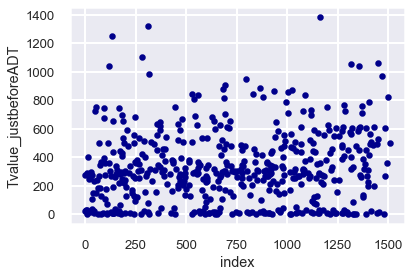

In [141]:
baseline_tt= df_results_baseline_avail[["Tvalue_justbeforeADT"]].reset_index()
baseline_tt.fillna('', inplace=True)
ax=baseline_tt.plot.scatter(x= "index", y="Tvalue_justbeforeADT", c='DarkBlue')

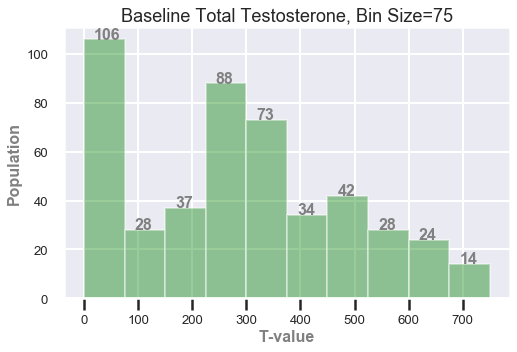

In [142]:
###plot the T value histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=75

bins=np.arange(0, 800, binsize)
fig, ax = plt.subplots(figsize = (8,5))

(n, bins, patches) = plt.hist(baseline_tt["Tvalue_justbeforeADT"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Baseline Total Testosterone, Bin Size="+ str(int(binsize)),fontsize=18)
plt.xlabel("T-value", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 800, 100))
ax.set_xticklabels(np.arange(0, 800, 100))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.2
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

# how many have ADT duration =0?

In [143]:
df_results_baseline_ADTzero=df_results_baseline[df_results_baseline["Inital_ADT_time_window_days"]<=0]
print(len(df_results_baseline_ADTzero))

0


In [144]:
df_results_baseline_ADTzero

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate_justbeforeADT,Tvalue_justbeforeADT,baseline avail Status,N_T_dates,N_T_dates_beforeADT


In [145]:
#output this table 
df_results_baseline.to_csv("./data/sean_big_cohort_approach2_1783pts_with_adt_window_and_baseline_info_Feb24_2021.csv",encoding='utf-8', index=False)
df_results_baseline_avail.to_csv("./data/sean_big_cohort_approach2_507pts_with_adt_window_and_baseline_T_Feb24_2021.csv",encoding='utf-8', index=False)

# For the 507 pts with T baseline, how many recovery how many non recovery? #df_results_baseline

# T recovery threshold = 75.0 ng/dL

In [146]:
#work with two dataframes, df4 (for the adt info) and df_test
#df4=df_adt_results_notna
#list_adt_pt=df4["person_id"].to_list()
df1=df_results_baseline_avail
df2=df_test
result_status_list_baseline75=[]

list_adt_pt_baselineavail=df_results_baseline_avail['person_id'].to_list()

for y in list_adt_pt_baselineavail:     
    df1_pt=df1[(df1["person_id"] == y)]

    if(pd.isnull(df1_pt['inital_ADT_end_date'].iloc[0])):
        b='NaN'
        #gap='NaN'
        tdate='NaN'
        tvalue='NaN'
        status="NaN"
        N_t_dates='NaN'
        N_t_dates_afterADT='NaN'

    #if(df1_pt.inital_ADT_end_date.values.any()!=""):
    if(pd.notnull(df1_pt['inital_ADT_end_date'].iloc[0])):

        b=df1_pt['inital_ADT_end_date'].to_list()[0]
        
        df2_pt=df2[(df2["person_id"] == y)]    
        each_pt_tdates = df2_pt['result_date'].to_list()

        ##get rid of nan
        cleaned_a=[]
        cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
        cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
        cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
        N_t_dates=len(cleaned_aaa)

        #only keep the ones after ADT end date including on the day
        cleaned_aaaa= [x for x in cleaned_aaa if x >=b]
        start_sorted_bin=sorted(cleaned_aaaa)
        N_t_dates_afterADT=len(cleaned_aaaa)
   
        if(len(start_sorted_bin)==0):
            tdate='NaN' 
            tvalue="NaN"
            status="NaN"

#get the 75
        if(len(start_sorted_bin)>0):
            df3_pt=df2_pt[df2_pt.test_results >=75][df2_pt.result_date >=b]
            df4_pt=df2_pt[df2_pt.test_results <75][df2_pt.result_date >=b]

            if not df3_pt.empty:
                status ="Y"
                tdate=df3_pt['result_date'].to_list()[0]
                tvalue=df3_pt['test_results'].to_list()[0]
            
            #if not df4_pt.empty:
            if df3_pt.empty:
                status ="N"
                tdate=df4_pt['result_date'].to_list()[-1]
                tvalue=df4_pt['test_results'].to_list()[-1]
    
    #print(y, b, tdate, tvalue,status, N_t_dates,N_t_dates_afterADT)
    result_status_per_pt=[y,b,tdate, tvalue, status,N_t_dates,N_t_dates_afterADT]
    result_status_list_baseline75.append(result_status_per_pt)

/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [147]:
dfbaseline_recovery_result75=pd.DataFrame(result_status_list_baseline75)
dfbaseline_recovery_result75.columns=(['person_id', 'inital_ADT_end_date', 'Tdate_rec_norec75', 'Tvalue_rec_norec75', 'Status75',"N_T_dates","N_T_dates_afterADT"])

dfbaseline_recovery_result75_recovery=dfbaseline_recovery_result75[dfbaseline_recovery_result75["Status75"]=="Y"]
dfbaseline_recovery_result75_nonrecovery=dfbaseline_recovery_result75[dfbaseline_recovery_result75["Status75"]=="N"]
dfbaseline_recovery_result75_nan=dfbaseline_recovery_result75[dfbaseline_recovery_result75["Status75"]=="NaN"]

dfbaseline_recovery_result75[:5]

print("pts with ADT window and T baseline:")
print(shape(dfbaseline_recovery_result75)[0])
print("pts with ADT window and T baseline and T recovery:")
print(shape(dfbaseline_recovery_result75_recovery)[0])
print("pts with ADT window and T baseline and T NON recovery:")
print(shape(dfbaseline_recovery_result75_nonrecovery)[0])
print("pts with ADT window and T baseline and T test unavial:")
print(shape(dfbaseline_recovery_result75_nan)[0])

dfbaseline_recovery_result75.to_csv("sean_big_cohort_approach2_pts_with_adt_window_and_baseline_T_and_recovery_status75ngdL_Feb24_2021.csv",encoding='utf-8', index=False)

pts with ADT window and T baseline:
507
pts with ADT window and T baseline and T recovery:
157
pts with ADT window and T baseline and T NON recovery:
141
pts with ADT window and T baseline and T test unavial:
209


In [148]:
#get the pt list for sql input

recovery75_pt_list=dfbaseline_recovery_result75_recovery['person_id'].to_list()
nonrecovery75_pt_list=dfbaseline_recovery_result75_nonrecovery['person_id'].to_list()

# T recovery threshold = 300.0 ng/dL

In [150]:
df1[:5]

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate_justbeforeADT,Tvalue_justbeforeADT,baseline avail Status,N_T_dates,N_T_dates_beforeADT
0,2,2009-02-26,2009-09-15,201.0,2009-02-09,274.18,Y,82,20
1,13,2010-06-17,2015-03-17,1734.0,2009-09-18,23.72,Y,23,2
4,25,2013-11-01,2014-02-18,109.0,2013-10-15,31.54,Y,12,1
7,38,2015-11-18,2016-07-18,243.0,2015-11-18,288.37,Y,20,5
8,53,2013-02-25,2016-10-03,1316.0,2012-07-30,0.96,Y,26,1


In [151]:
##test test test: non recovery pts count should not be zero

#work with two dataframes, df4 (for the adt info) and df_test
#df4=df_adt_results_notna
#list_adt_pt=df4["person_id"].to_list()
df1=df_results_baseline_avail
df2=df_test
result_status_list_baseline300=[]

list_adt_pt_baselineavail=df_results_baseline_avail['person_id'].to_list()

for y in list_adt_pt_baselineavail:     
    df1_pt=df1[(df1["person_id"] == y)]

    if(pd.isnull(df1_pt['inital_ADT_end_date'].iloc[0])):
        b='NaN'
        gap='NaN'
        tdate='NaN'
        tvalue='NaN'
        status="NaN"
        N_t_dates='NaN'
        N_t_dates_afterADT='NaN'

    #if(df1_pt.inital_ADT_end_date.values.any()!=""):
    if(pd.notnull(df1_pt['inital_ADT_end_date'].iloc[0])):

        b=df1_pt['inital_ADT_end_date'].to_list()[0]
        gap=df1_pt['Inital_ADT_time_window_days'].to_list()[0]       
        df2_pt=df2[(df2["person_id"] == y)]    
        each_pt_tdates = df2_pt['result_date'].to_list()

        ##get rid of nan
        cleaned_a=[]
        cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
        cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
        cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
        N_t_dates=len(cleaned_aaa)

        #only keep the ones after ADT end date including on the day
        cleaned_aaaa= [x for x in cleaned_aaa if x >=b]
        start_sorted_bin=sorted(cleaned_aaaa)
        N_t_dates_afterADT=len(cleaned_aaaa)
   
        if(len(start_sorted_bin)==0):
            tdate='NaN' 
            tvalue="NaN"
            status="NaN"

#get the 300
        if(len(start_sorted_bin)>0):
            df3_pt=df2_pt[df2_pt.test_results >=300][df2_pt.result_date >=b]
            df4_pt=df2_pt[df2_pt.test_results <300][df2_pt.result_date >=b]

            if not df3_pt.empty:
                status ="Y"
                tdate=df3_pt['result_date'].to_list()[0]
                tvalue=df3_pt['test_results'].to_list()[0]
            
            #if not df4_pt.empty:
            if df3_pt.empty:
                status ="N"
                tdate=df4_pt['result_date'].to_list()[-1]
                tvalue=df4_pt['test_results'].to_list()[-1]
    
    #print(y, b, gap, tdate, tvalue,status, N_t_dates,N_t_dates_afterADT)
    result_status_per_pt=[y,b,gap, tdate, tvalue, status,N_t_dates,N_t_dates_afterADT]
    result_status_list_baseline300.append(result_status_per_pt)

/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [152]:
dfbaseline_recovery_result300=pd.DataFrame(result_status_list_baseline300)
dfbaseline_recovery_result300.columns=(['person_id', 'inital_ADT_end_date','Inital_ADT_time_window_days', 'Tdate_rec_norec300', 'Tvalue_rec_norec300', 'Status300',"N_T_dates","N_T_dates_afterADT"])

dfbaseline_recovery_result300_recovery=dfbaseline_recovery_result300[dfbaseline_recovery_result300["Status300"]=="Y"]
dfbaseline_recovery_result300_nonrecovery=dfbaseline_recovery_result300[dfbaseline_recovery_result300["Status300"]=="N"]

dfbaseline_recovery_result300[:5]

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate_rec_norec300,Tvalue_rec_norec300,Status300,N_T_dates,N_T_dates_afterADT
0,2,2009-09-15,201.0,2017-04-11,4.8,N,82,61
1,13,2015-03-17,1734.0,2017-12-14,4.33,N,23,15
2,25,2014-02-18,109.0,2020-01-21,238.49,N,12,11
3,38,2016-07-18,243.0,2018-04-16,317.16,Y,20,13
4,53,2016-10-03,1316.0,NaT,NaN,NaN,26,0


In [153]:
print(shape(dfbaseline_recovery_result300)[0])
print(shape(dfbaseline_recovery_result300_recovery)[0])
print(shape(dfbaseline_recovery_result300_nonrecovery)[0])

dfbaseline_recovery_result300['ADT_to_T'] = dfbaseline_recovery_result300['Tdate_rec_norec300'] - dfbaseline_recovery_result300['inital_ADT_end_date']
dfbaseline_recovery_result300['ADT_to_T_days']=dfbaseline_recovery_result300['ADT_to_T'].dt.days

dfbaseline_recovery_result300.to_csv("sean_big_cohort_approach2_pts_with_adt_window_and_baseline_T_and_recovery_status300ngdL_Feb24_2021_4PM.csv",encoding='utf-8', index=False)

507
99
199


In [156]:
dfbaseline_recovery_result300[:3]

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate_rec_norec300,Tvalue_rec_norec300,Status300,N_T_dates,N_T_dates_afterADT,ADT_to_T,ADT_to_T_days
0,2,2009-09-15,201.0,2017-04-11,4.8,N,82,61,2765 days,2765.0
1,13,2015-03-17,1734.0,2017-12-14,4.33,N,23,15,1003 days,1003.0
2,25,2014-02-18,109.0,2020-01-21,238.49,N,12,11,2163 days,2163.0


In [157]:
#approach #2; 
dfbaseline_result300_valid=dfbaseline_recovery_result300[dfbaseline_recovery_result300["Status300"]!="NaN"]
print(len(dfbaseline_result300_valid))

298


# How many pts have ADT to T recovery time not zero

In [158]:
#dfbaseline_recovery_result300['ADT_to_T'] = dfbaseline_recovery_result300['Tdate_rec_norec300'] - dfbaseline_recovery_result300['inital_ADT_end_date']
#dfbaseline_recovery_result300['ADT_to_T_days']=dfbaseline_recovery_result300['ADT_to_T'].dt.days

dfbaseline_result300_valid_adt_t_notzero=dfbaseline_result300_valid[dfbaseline_result300_valid['ADT_to_T_days']!=0]
print(len(dfbaseline_result300_valid_adt_t_notzero))

252


In [161]:
dfbaseline_result300_valid_adt_t_notzero[:3]

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate_rec_norec300,Tvalue_rec_norec300,Status300,N_T_dates,N_T_dates_afterADT,ADT_to_T,ADT_to_T_days
0,2,2009-09-15,201.0,2017-04-11,4.8,N,82,61,2765 days,2765.0
1,13,2015-03-17,1734.0,2017-12-14,4.33,N,23,15,1003 days,1003.0
2,25,2014-02-18,109.0,2020-01-21,238.49,N,12,11,2163 days,2163.0


In [162]:
df_app2_finalcohort=dfbaseline_result300_valid_adt_t_notzero[dfbaseline_result300_valid_adt_t_notzero['Inital_ADT_time_window_days']>0]
print(len(df_app2_finalcohort))

252


In [163]:
#get the pt list for sql input

dfbaseline_recovery_result300_recovery.to_csv("rec300_fixbugs_approach#2.csv",encoding='utf-8', index=False)
dfbaseline_recovery_result300_nonrecovery.to_csv("nonrec300_fixbugs_approach#2.csv",encoding='utf-8', index=False)
#check if this list is different for the one without dealing with duplicated date issue

app2_rec300_pt_list=dfbaseline_recovery_result300_recovery["person_id"].to_list()
app2_nonrec300_pt_list=dfbaseline_recovery_result300_nonrecovery["person_id"].to_list()
print(len(app2_rec300_pt_list))
print(len(app2_nonrec300_pt_list))

99
199


In [164]:
app2_rec300_pt_list_finalcohort=dfbaseline_result300_valid_adt_t_notzero[dfbaseline_result300_valid_adt_t_notzero['Status300']=='N']
app2_rec300_pt_list_finalcohort_pt_list=app2_rec300_pt_list_finalcohort["person_id"].to_list()
print(len(app2_rec300_pt_list_finalcohort_pt_list))

154


# How many of the T recovery and non recovery are overlaped for approach #2 and #3?

In [167]:
dfbaseline_recovery_result300_recovery.to_csv("./data/rec300_fixbugs_approach#2.csv",encoding='utf-8', index=False)
dfbaseline_recovery_result300_nonrecovery.to_csv("./data/nonrec300_fixbugs_approach#2.csv",encoding='utf-8', index=False)

In [168]:
df_final_cohort_approach3=pd.read_csv("./data/sean_big_cohort_approach#3_pts_ADT_T_notzero_ptlist.csv", header=0)

In [169]:
app2_final_cohort_pt_list=df_app2_finalcohort["person_id"].to_list()
app3_final_cohort_pt_list=df_final_cohort_approach3["person_id"].to_list()

pts_app2_app3=[x for x in app2_final_cohort_pt_list if x in app3_final_cohort_pt_list]
pts_app2_not_app3=[x for x in app2_final_cohort_pt_list if x not in app3_final_cohort_pt_list]
pts_app3_not_app2=[x for x in app3_final_cohort_pt_list if x not in app2_final_cohort_pt_list]

print(len(pts_app2_app3))
print(len(pts_app2_not_app3))
print(len(pts_app3_not_app2))

#save the list for QC
df_pts_app2_app3_list=DataFrame(pts_app2_app3,columns=['pt_id'])
df_pts_app2_not_app3_list=DataFrame(pts_app2_not_app3,columns=['pt_id'])
df_pts_pts_app3_not_app2_list=DataFrame(pts_app3_not_app2,columns=['pt_id'])

df_pts_app2_app3_list.to_csv("221pts_app2_app3_shared_list.csv",encoding='utf-8', index=False)
df_pts_app2_not_app3_list.to_csv("31pts_app2_not_app3_list.csv",encoding='utf-8', index=False)
df_pts_pts_app3_not_app2_list.to_csv("58pts_app3_not_app2_list.csv",encoding='utf-8', index=False)

221
31
58


In [173]:
df_final_cohort_approach3=pd.read_csv("./data/sean_big_cohort_approach#3_pts_ADT_T_notzero_ptlist.csv", header=0)

df_rec300_fixbugs_approach3.columns=(['person_id'])
df_nonrec300_fixbugs_approach3.columns=(['person_id'])

app3_rec300_pt_list=df_rec300_fixbugs_approach3["person_id"].to_list()
app3_nonrec300_pt_list=df_nonrec300_fixbugs__approach3["person_id"].to_list()

pts_rec300_shared_app2_app3=[x for x in app3_rec300_pt_list if x in app2_rec300_pt_list]
pts_rec300_shared_app2_not_app3=[x for x in app2_rec300_pt_list if x not in app3_rec300_pt_list]
pts_rec300_shared_app3_not_app2=[x for x in app3_rec300_pt_list if x not in app2_rec300_pt_list]

pts_nonrec300_shared_app2_app3=[x for x in app3_nonrec300_pt_list if x in app2_nonrec300_pt_list]
pts_nonrec300_shared_app2_app3=[x for x in app3_nonrec300_pt_list if x not in app2_nonrec300_pt_list]

NameError: name 'df_rec300_fixbugs_approach3' is not defined

In [171]:
print(len(pts_rec300_shared_app2_app3))

NameError: name 'pts_rec300_shared_app2_app3' is not defined

In [ ]:
pts_finalcohort_shared_app2_app3=[x for x in app3_rec300_pt_list+app3_nonrec300_pt_list if x in app2_rec300_pt_list+app2_nonrec300_pt_list]
print(len(pts_finalcohort_shared_app2_app3))

In [ ]:
pts_finalcohort_shared_app2_not_app3=[x for x in app2_rec300_pt_list+app2_nonrec300_pt_list if x not in app3_rec300_pt_list+app3_nonrec300_pt_list]
print(len(pts_finalcohort_shared_app2_not_app3))

In [ ]:
pts_finalcohort_shared_app3_not_app2=[x for x in app3_rec300_pt_list+app3_nonrec300_pt_list if x not in app2_rec300_pt_list+app2_nonrec300_pt_list]
print(len(pts_finalcohort_shared_app3_not_app2))

In [ ]:
pts_rec300_shared_app2_not_app3=[x for x in app2_rec300_pt_list if x not in app3_rec300_pt_list]
print(len(pts_rec300_shared_app2_not_app3))

In [ ]:
pts_rec300_shared_app3_not_app2=[x for x in app3_rec300_pt_list if x not in app2_rec300_pt_list]
print(len(pts_rec300_shared_app3_not_app2))

In [ ]:
# get rid of the ADT_T =0 patients

In [ ]:
df_2and3=DataFrame(pts_nonrec300_shared_app2_app3,columns=['pt_id'])
df_2not3=DataFrame(pts_rec300_shared_app2_not_app3,columns=['pt_id'])
df_3not2=DataFrame(pts_rec300_shared_app3_not_app2,columns=['pt_id'])

df_2and3.to_csv("rec300_2and3.csv",encoding='utf-8', index=False)
df_2not3.to_csv("rec300_2not3.csv",encoding='utf-8', index=False)
df_3not2.to_csv("rec300_3not2.csv",encoding='utf-8', index=False)

# For the final cohort, what is the baseline T distribution ?

In [175]:
##get the baseline T dates and values
result_baseline_list=[]
#pt_list=app2_final_cohort_pt_list
#pt_list=app2_rec300_pt_list
#pt_list=app2_nonrec300_pt_list
pt_list=app2_rec300_pt_list_finalcohort_pt_list

for y in pt_list:
#for y in [125]:

    #print(y)    
    df4_pt=df4[(df4["person_id"] == y)]
    
    if(pd.isnull(df4_pt['inital_ADT_start_date'].iloc[0])):
        a='NaN'
        b='NaN'
        gap="NaN"
        status='NaN'
        tdate='NaN'
        tvalue='NaN'
        N_t_dates='NaN'
        N_t_dates_beforeADT='NaN'
            
    if(pd.notnull(df4_pt['inital_ADT_start_date'].iloc[0])):
        a=df4_pt['inital_ADT_start_date'].to_list()[0]
        b=df4_pt['inital_ADT_end_date'].to_list()[0]
        gap=df4_pt['Inital_ADT_time_window_days'].to_list()[0]

        df_test_pt=df_test[(df_test["person_id"] == y)]    
        each_pt_tdates =df_test_pt['result_date'].to_list()

        ##get rid of nan
        cleaned_a=[]
        cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
        cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
        cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
        N_t_dates=len(cleaned_aaa)

        #only keep the ones before ADT start date, including on the day
        cleaned_aaaa= [x for x in cleaned_aaa if x <=a]
        start_sorted_bin=sorted(cleaned_aaaa)
        N_t_dates_beforeADT=len(cleaned_aaaa) #including the date when adt started
    
        if(len(start_sorted_bin)==0):
            tdate='NaN' 
            tvalue="NaN"
            #status means no baseline TT avail
            status="N"
        #print(tdate)
        
        if(len(start_sorted_bin)>0):
            #apply the closet function
            #tdate=closest(start_sorted_bin,a)   
            df_test_qualify_pt=df_test_pt[df_test_pt.result_date <=a]
            
            if not df_test_qualify_pt.empty:
                tdate=df_test_qualify_pt['result_date'].to_list()[-1]
                tvalue=df_test_qualify_pt['test_results'].to_list()[-1]
                #status means yes there are baseline TT avail
                status="Y"

    #print(y,a,b,gap, tdate,tvalue,status,N_t_dates,N_t_dates_beforeADT)
    result_per_pt=[y,a,b,gap, tdate,tvalue, status, N_t_dates, N_t_dates_beforeADT]
    result_baseline_list.append(result_per_pt)
    #validate 

In [176]:
df_final_cohort_results_baseline=pd.DataFrame(result_baseline_list)
df_final_cohort_results_baseline.columns=(['person_id', 'inital_ADT_start_date', 'inital_ADT_end_date', 'Inital_ADT_time_window_days', 'Tdate_justbeforeADT', 'Tvalue_justbeforeADT', "baseline avail Status", "N_T_dates","N_T_dates_beforeADT"])

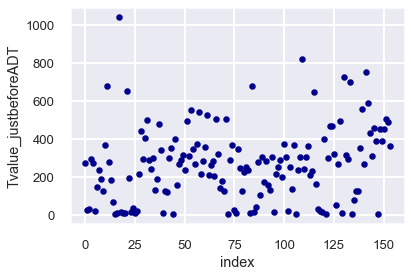

In [177]:
baseline_tt=df_final_cohort_results_baseline[["Tvalue_justbeforeADT"]].reset_index()
baseline_tt.fillna('', inplace=True)
ax=baseline_tt.plot.scatter(x= "index", y="Tvalue_justbeforeADT", c='DarkBlue')

In [178]:
print(len(baseline_tt))

154


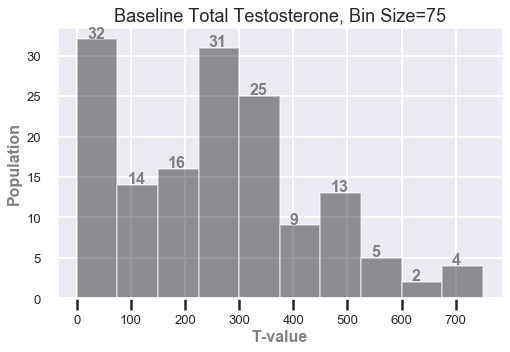

In [182]:
###plot the T value histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=75

bins=np.arange(0, 800, binsize)
fig, ax = plt.subplots(figsize = (8,5))

(n, bins, patches) = plt.hist(baseline_tt["Tvalue_justbeforeADT"], bins=bins,color="black", alpha=0.4)

#decorate

plt.title("Baseline Total Testosterone, Bin Size="+ str(int(binsize)),fontsize=18)
plt.xlabel("T-value", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 800, 100))
ax.set_xticklabels(np.arange(0, 800, 100))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.2
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()